In [10]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [2]:
# Initialising the CNN
classifier = Sequential()

# Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the CNN to the images

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/home/aydinnyunus/PycharmProjects/Covid/dataset/training',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/home/aydinnyunus/PycharmProjects/Covid/dataset/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

classifier.fit_generator(training_set,
                         steps_per_epoch = 200,
                         epochs = 3,
                         validation_data = test_set,
                         validation_steps = 50)

Found 36 images belonging to 2 classes.
Found 14 images belonging to 2 classes.
Epoch 1/3
200/200 [==============================] - 92s 460ms/step - loss: 0.1507 - accuracy: 0.9244 - val_loss: 0.0421 - val_accuracy: 1.0000
Epoch 2/3
200/200 [==============================] - 92s 460ms/step - loss: 0.0608 - accuracy: 0.9769 - val_loss: 0.1020 - val_accuracy: 0.9286
Epoch 3/3
200/200 [==============================] - 101s 503ms/step - loss: 0.0076 - accuracy: 0.9978 - val_loss: 0.0595 - val_accuracy: 1.0000


In [3]:
##Prediction Part

img_pred = image.load_img('/home/aydinnyunus/Desktop/covid0.jpg', target_size = (64, 64))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = classifier.predict(img_pred)

ind = training_set.class_indices

if rslt[0][0] == 1:
    prediction = "Normal"
else:
    prediction = "COVID"

##Save model to json
import os
from keras.models import model_from_json

clssf = classifier.to_json()
with open("Covid.json", "w") as json_file:
    json_file.write(clssf)
classifier.save_weights("Covid.h5")
print("model saved to disk....")
print(prediction)

model saved to disk....
COVID


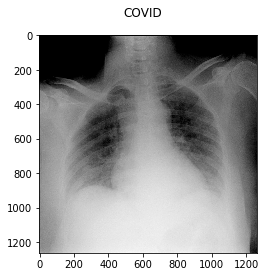

In [11]:
img_src = '/home/aydinnyunus/Desktop/covid0.jpg'
img = cv2.imread(img_src)

img_pred = image.load_img('/home/aydinnyunus/Desktop/covid0.jpg', target_size = (64, 64))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = classifier.predict(img_pred)

ind = training_set.class_indices

if rslt[0][0] == 1:
    prediction = "Normal"
else:
    prediction = "COVID"

target_width = 50
target_height = 50
target_size = (target_width, target_height)

img = cv2.resize(img, target_size)
img = img.reshape(1, target_width, target_height, 3)


fig, ax = plt.subplots()
fig.suptitle(prediction, fontsize=12)

np_img = mpimg.imread(img_src)
plt.imshow(np_img)

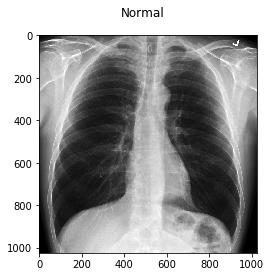

In [12]:
img_src = '/home/aydinnyunus/Desktop/test.jpg'
img = cv2.imread(img_src)

img_pred = image.load_img('/home/aydinnyunus/Desktop/test.jpg', target_size = (64, 64))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = classifier.predict(img_pred)

ind = training_set.class_indices

if rslt[0][0] == 1:
    prediction = "Normal"
else:
    prediction = "COVID"
target_width = 50
target_height = 50
target_size = (target_width, target_height)

img = cv2.resize(img, target_size)
img = img.reshape(1, target_width, target_height, 3)


fig, ax = plt.subplots()
fig.suptitle(prediction, fontsize=12)

np_img = mpimg.imread(img_src)
plt.imshow(np_img)

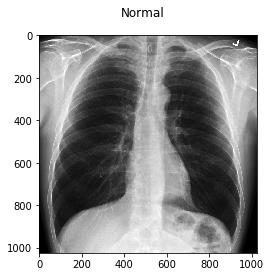

In [13]:
img_src = '/home/aydinnyunus/Desktop/normal.jpg'
img = cv2.imread(img_src)

img_pred = image.load_img('/home/aydinnyunus/Desktop/normal.jpg', target_size = (64, 64))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = classifier.predict(img_pred)

ind = training_set.class_indices

if rslt[0][0] == 1:
    prediction = "Normal"
else:
    prediction = "COVID"
target_width = 50
target_height = 50
target_size = (target_width, target_height)

img = cv2.resize(img, target_size)
img = img.reshape(1, target_width, target_height, 3)


fig, ax = plt.subplots()
fig.suptitle(prediction, fontsize=12)

np_img = mpimg.imread(img_src)
plt.imshow(np_img)